## Лабораторная работа №2: Pandas 
---------
Шаина М.М. 6132-010402D

#### 1.  Считать в pandas DataFrame любой источник данных

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np

from datetime import date
import matplotlib.pyplot as plt

In [2]:
# Считаем csv файл
data = pd.read_csv('data.csv', delimiter = ',', encoding= 'unicode_escape')

Описание датасета. Датасет содержит все транзакции за восьмимесячный период (01/12/2010-09/12/2011) для британской онлайн-розничной компании.

#### 2. Совершить с датафреймом следующие операции: 

In [3]:
data.head() #To view a small sample of a Series or DataFrame object (по умолчанию - 5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
# Cчитайть значение конкретной ячейки (с конкретным индексом из конкретной колонки)

#Вывести список всех стран из колонки country
data.index, data.columns

(RangeIndex(start=0, stop=541909, step=1),
 Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
        'UnitPrice', 'CustomerID', 'Country'],
       dtype='object'))

2.1 Фильтрация строк по диапазону индекса

In [6]:
data[ :8 ]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom


2.2 Фильтрация набора данных по какому-либо условию

In [7]:
# Фильтрация DataFrame с помощью булевых массивов
data[data.UnitPrice < 100]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


2.3 Работа с пропущенными значениями.

Проверяем данные на наличие пропусков и типов переменных. Начнем с проверки общей информации о данных. Для того чтобы это сделать, нужно вызвать метод info().



In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


В результате мы видим, что все колонки, кроме колонок 'Description' и 'Customer ID', содержат по 541 909 строк.

In [9]:
# Т.к. массив очень большой, вряд ли этот метод позволит нам увидеть наличие пропущенных значений
missing_data = data.isnull() 

In [10]:
# Поэтому, воспользуемся циклом:

for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print(" ")

InvoiceNo
False    541909
Name: InvoiceNo, dtype: int64
 
StockCode
False    541909
Name: StockCode, dtype: int64
 
Description
False    540455
True       1454
Name: Description, dtype: int64
 
Quantity
False    541909
Name: Quantity, dtype: int64
 
InvoiceDate
False    541909
Name: InvoiceDate, dtype: int64
 
UnitPrice
False    541909
Name: UnitPrice, dtype: int64
 
CustomerID
False    406829
True     135080
Name: CustomerID, dtype: int64
 
Country
False    541909
Name: Country, dtype: int64
 


Значения "True" представляют отсуствующие значения, а "False" означает, что значение присуствует в наборе.

In [11]:
data.isnull().sum() # Посмотрим сколько пропущенных значений в каждой колонке 

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

В целом, интуитивно понятно, что не у всех товаров может быть описание в реальных данных. Решение: Сначала удалим строки с пропущеным описанием товара, а потом пропущенные значения из колонки "CustomerID" заполним средним значением.

In [12]:
data.drop(['Description'], axis = 1, inplace = True)

In [13]:
# Заполнение пропущенных значений средним значением по колонке

data['CustomerID'].fillna(data['CustomerID'].mean(), inplace = True) 

In [14]:
# Проверим наличие пропущенных значений

data.isnull().sum()

InvoiceNo      0
StockCode      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Отлично:) Двигаемся дальше

2.4 Cоздание нового поля вычисленного на основе значений других полей:

In [15]:
# через выражение на базе имеющихся колонок

# Создадим колонку с общей стоимостью товара 
data.assign(Price=lambda x: (x["Quantity"] * x["UnitPrice"])).head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [16]:
# через DataFrame.apply
data['Price'] = data.apply( lambda row: row['Quantity'] * row['UnitPrice'], axis = 1 )
data.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [17]:
# через Series.apply
data['Price_'] = data['Price'].apply(lambda row: row)
data['Price_'].head(10)

0    15.30
1    20.34
2    22.00
3    20.34
4    20.34
5    15.30
6    25.50
7    11.10
8    11.10
9    54.08
Name: Price_, dtype: float64

In [18]:
# удаляем лишние колонки, которые мы навычисляли
#data.drop(['Price', 'Price_'], axis='columns').head()
del data['Price']
del data['Price_']
data.head(8)

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,6,12/1/2010 8:28,1.85,17850.0,United Kingdom


2.5 Cортировка по какому-либо из полей

In [19]:
data.sort_values( by = 'UnitPrice' ).head(8)

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299984,A563187,B,1,8/12/2011 14:52,-11062.06,15287.69057,United Kingdom
299983,A563186,B,1,8/12/2011 14:51,-11062.06,15287.69057,United Kingdom
40984,539750,22652,1,12/21/2010 15:40,0.00,15287.69057,United Kingdom
52217,540696,84562A,1,1/11/2011 9:14,0.00,15287.69057,United Kingdom
52262,540699,POST,1000,1/11/2011 9:32,0.00,15287.69057,United Kingdom
344867,567113,85215,-29,9/16/2011 13:39,0.00,15287.69057,United Kingdom
204945,554696,85016,5,5/25/2011 17:14,0.00,15287.69057,United Kingdom
104419,545176,18098C,6,2/28/2011 14:19,0.00,15287.69057,United Kingdom


Вычислить несколько статистик по колонкам, используя встроенные агрегатные функции 

In [20]:
for i in data:
    min_price = 0
    if data.UnitPrice.min()<0:
        i+=str(1)
    elif data.UnitPrice.min()==0:
        i+=str(1)
    else:
        min_price = data.UnitPrice.min()
        
print(f"Минимальная цена: {float(min_price)}\n")
print(f"Среднее значение цены: {data.UnitPrice.mean()}\n") 
print (f"Максимальная цена: {data['UnitPrice'].max()}")

Минимальная цена: 0.0

Среднее значение цены: 4.611113626083471

Максимальная цена: 38970.0


In [21]:
# Можем применить сразу несколько функций к столбцу 'UnitPrice'
agg_func_math = {
    'UnitPrice': ['sum', 'mean', 'median', 'min', 'max', 'std', 'var', 'mad']
}

In [22]:
data.groupby(['Country']).agg(agg_func_math).round(2)

UnitPrice                                             \
                             sum    mean median       min       max     std   
Country                                                                       
Australia                4054.75    3.22   1.79      0.00    350.00   12.46   
Austria                  1701.52    4.24   1.95      0.12     40.00    7.36   
Bahrain                    86.57    4.56   3.81      1.25     12.75    3.47   
Belgium                  7540.13    3.64   1.95      0.12     39.95    4.24   
Brazil                    142.60    4.46   3.32      0.85     10.95    2.83   
Canada                    910.58    6.03   1.65      0.10    550.94   44.71   
Channel Islands          3738.55    4.93   2.55      0.19    293.00   15.55   
Cyprus                   3920.07    6.30   2.95      0.12    320.69   22.42   
Czech Republic             88.15    2.94   1.45      0.29     40.00    7.10   
Denmark                  1266.95    3.26   1.95      0.21     18.00    3.96   
EIRE                    48447.19    5.91   2.10      0.00   1917.00   54.04   
European Community        294.05    4.82   3.35      0.55     18.00    4.38   
Finland                  3786.85    5.45   2.08      0.12    275.60   13.60   
France                  43031.99    5.03   1.79      0.00   4161.06   79.91   
Germany                 37666.00    3.97   1.95      0.00    599.50   16.55   
Greece                    713.29    4.89   2.10      0.14     50.00    8.47   
Hong Kong               12241.50   42.51   2.33      0.21   2653.95  307.65   
Iceland                   481.21    2.64   2.02      0.25     12.75    2.26   
Israel                   1079.04    3.63   1.95      0.06    125.00    8.60   
Italy                    3879.39    4.83   2.55      0.12    300.00   11.81   
Japan                     814.86    2.28   1.65      0.21     45.57    3.09   
Lebanon                   242.44    5.39   3.95      0.55     14.95    4.07   
Lithuania                  99.44    2.84   2.55      1.25      5.95    1.37   
Malta                     666.01    5.24   2.95      0.19     65.00    9.38   
Netherlands              6492.55    2.74   1.45      0.00    206.40    6.31   
Norway                   6529.06    6.01   2.08      0.00    700.00   30.56   
Poland                   1422.27    4.17   2.08      0.19     40.00    5.91   
Portugal                13037.54    8.58   1.65      0.12   1241.98   71.38   
RSA                       248.10    4.28   2.95      0.00     14.95    3.67   
Saudi Arabia               24.11    2.41   2.30      0.42      5.49    1.39   
Singapore               25108.89  109.65   2.10      0.19   3949.32  515.28   
Spain                   12633.45    4.99   2.08      0.00   1715.85   41.00   
Sweden                   1806.83    3.91   1.65      0.19     40.00    8.29   
Switzerland              6813.69    3.40   1.69      0.00     40.00    5.39   
USA                       644.98    2.22   1.45      0.42     16.95    2.26   
United Arab Emirates      229.89    3.38   1.67      0.29     37.50    5.34   
United Kingdom        2245715.47    4.53   2.10 -11062.06  38970.00   99.32   
Unspecified              1204.01    2.70   1.65      0.19     16.95    2.87   

                                         
                            var     mad  
Country                                  
Australia                155.14    2.43  
Austria                   54.10    3.82  
Bahrain                   12.07    2.61  
Belgium                   18.02    2.91  
Brazil                     8.02    2.52  
Canada                  1999.31    7.79  
Channel Islands          241.72    4.20  
Cyprus                   502.64    6.18  
Czech Republic            50.39    2.76  
Denmark                   15.68    2.52  
EIRE                    2919.80    6.23  
European Community        19.15    3.32  
Finland                  184.85    5.53  
France                  6385.47    5.41  
Germany                  273.87    3.55  
Greece                    7

#### 3. Продемонстрировать работу .groupby, на основе группировок в groupby вычисляете агрегатные функции по одной или нескольким колонкам

In [23]:
# Посмотрим, какие вообще есть страны производители 
df = data.drop(['CustomerID'], axis = 1) 
df = df.drop(['UnitPrice'], axis = 1)
by_country = df.groupby('Country')
by_country.describe()

Quantity                                               \
                         count       mean         std      min    25%   50%   
Country                                                                       
Australia               1259.0  66.444003   97.686932   -120.0   6.00  24.0   
Austria                  401.0  12.037406   21.745485    -48.0   6.00   9.0   
Bahrain                   19.0  13.684211   30.016759    -54.0   5.00   6.0   
Belgium                 2069.0  11.189947   13.601441    -12.0   4.00  10.0   
Brazil                    32.0  11.125000    8.476723      2.0   3.00  10.0   
Canada                   151.0  18.298013   46.682587      1.0   6.00  12.0   
Channel Islands          758.0  12.505277   22.570877     -2.0   4.00  10.0   
Cyprus                   622.0  10.155949   23.263590    -33.0   2.00   5.0   
Czech Republic            30.0  19.733333   22.813990    -24.0  12.00  24.0   
Denmark                  389.0  21.048843   27.402502    -25.0  12.00  12.0   
EIRE                    8196.0  17.403245   40.368435   -288.0   4.00  10.0   
European Community        61.0   8.147541    6.546847     -2.0   3.00   6.0   
Finland                  695.0  15.346763   21.001421    -27.0   6.00  10.0   
France                  8557.0  12.911067   21.425031   -250.0   5.00  10.0   
Germany                 9495.0  12.369458   17.865719   -288.0   5.00  10.0   
Greece                   146.0  10.657534    7.724067     -1.0   5.25  10.0   
Hong Kong                288.0  16.559028   16.936343     -1.0   6.00  11.0   
Iceland                  182.0  13.505495   18.856172      2.0   6.00  12.0   
Israel                   297.0  14.656566   16.026474    -32.0   4.00  11.0   
Italy                    803.0   9.961395   13.579809    -12.0   4.00   6.0   
Japan                    358.0  70.441341  177.191079   -624.0   4.00  36.0   
Lebanon                   45.0   8.577778    4.314294      2.0   6.00   8.0   
Lithuania                 35.0  18.628571   10.137542      6.0  12.00  16.0   
Malta                    127.0   7.433071    8.069726     -4.0   3.00   6.0   
Netherlands             2371.0  84.406580  111.369151   -480.0  16.00  72.0   
Norway                  1086.0  17.722836   22.644876    -12.0   6.00  12.0   
Poland                   341.0  10.712610   10.174628     -6.0   4.00  10.0   
Portugal                1519.0  10.651745   11.823938    -12.0   3.00   8.0   
RSA                       58.0   6.068966    3.329096      1.0   3.00   6.0   
Saudi Arabia              10.0   7.500000    5.720334     -5.0   6.00   9.0   
Singapore                229.0  22.855895   27.742886     -1.0   8.00  12.0   
Spain                   2533.0  10.589814   24.130396   -288.0   3.00   6.0   
Sweden                   462.0  77.136364  128.891540   -240.0   8.00  20.0   
Switzerland             2002.0  15.147353   18.956901   -120.0   6.00  12.0   
USA                      291.0   3.553265   16.450545    -36.0 -10.00   5.0   
United Arab Emirates      68.0  14.441176   12.474909      1.0   6.00  12.0   
United Kingdom        495478.0   8.605486  227.588756 -80995.0   1.00   3.0   
Unspecified              446.0   7.399103    8.765735      1.0   1.00   3.0   

                                      
                        75%      max  
Country                               
Australia              96.0   1152.0  
Austria                12.0    288.0  
Bahrain                10.0     96.0  
Belgium                12.0    272.0  
Brazil                 18.0     24.0  
Canada                 20.0    504.0  
Channel Islands        12.0    407.0  
Cyprus                 12.0    288.0  
Czech Republic         24.0     72.0  
Denmark                24.0    256.0  
EIRE                   12.0   1440.0  
European Community     12.0     24.0  
Finland                12.0    144.0  
France                 12.0    912.0  
Germany                12.0    600.0  
Greece                 12.0     48.0  
Hong Kong              24.0    144.0  
Ic

In [24]:
""" В следующем примере мы можем выбрать самую высокую (first) и самую низкую (last) стоимость товара
    в зависимости от страны, в котором совершили покупку """

agg_func_selection = {'UnitPrice': ['first', 'last']}

In [25]:
data.sort_values(by=['UnitPrice'], ascending=False).groupby(['Country']).agg(agg_func_selection)

UnitPrice          
                         first      last
Country                                 
Australia               350.00      0.00
Austria                  40.00      0.12
Bahrain                  12.75      1.25
Belgium                  39.95      0.12
Brazil                   10.95      0.85
Canada                  550.94      0.10
Channel Islands         293.00      0.19
Cyprus                  320.69      0.12
Czech Republic           40.00      0.29
Denmark                  18.00      0.21
EIRE                   1917.00      0.00
European Community       18.00      0.55
Finland                 275.60      0.12
France                 4161.06      0.00
Germany                 599.50      0.00
Greece                   50.00      0.14
Hong Kong              2653.95      0.21
Iceland                  12.75      0.25
Israel                  125.00      0.06
Italy                   300.00      0.12
Japan                    45.57      0.21
Lebanon                  14.95      0.55
Lithuania                 5.95      1.25
Malta                    65.00      0.19
Netherlands             206.40      0.00
Norway                  700.00      0.00
Poland                   40.00      0.19
Portugal               1241.98      0.12
RSA                      14.95      0.00
Saudi Arabia              5.49      0.42
Singapore              3949.32      0.19
Spain                  1715.85      0.00
Sweden                   40.00      0.19
Switzerland              40.00      0.00
USA                      16.95      0.42
United Arab Emirates     37.50      0.29
United Kingdom        38970.00 -11062.06
Unspecified              16.95      0.19

In [26]:
# Группировка по одному признаку
by_country.sum()

,Quantity
Country,
Australia,83653
Austria,4827
Bahrain,260
Belgium,23152
Brazil,356
Canada,2763
Channel Islands,9479
Cyprus,6317
Czech Republic,592


In [27]:
# Посмотрим на количество продаж в каждой стране (от минимального значения к максимальному)
by_country.sum().sort_values(by = 'Quantity')

,Quantity
Country,
Saudi Arabia,75
Bahrain,260
RSA,352
Brazil,356
Lebanon,386
European Community,497
Czech Republic,592
Lithuania,652
Malta,944


In [28]:
# Еще один пример со сбросом индексов:
df_grp = data.groupby('Country')['UnitPrice'].mean().reset_index()
df_grp

,Country,UnitPrice
0,Australia,3.220612
1,Austria,4.243192
2,Bahrain,4.556316
3,Belgium,3.644335
4,Brazil,4.456250
5,Canada,6.030331
6,Channel Islands,4.932124
7,Cyprus,6.302363
8,Czech Republic,2.938333
9,Denmark,3.256941


#### 4. Решейпинг данных 1Dto2D с помощью .pivot

In [29]:
# Подготовка датасета
data['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']). dt.normalize()
data = data.drop(['StockCode', 'CustomerID', 'InvoiceNo'], axis=1)
data.head()

,Quantity,InvoiceDate,UnitPrice,Country
0,6,2010-12-01,2.55,United Kingdom
1,6,2010-12-01,3.39,United Kingdom
2,8,2010-12-01,2.75,United Kingdom
3,6,2010-12-01,3.39,United Kingdom
4,6,2010-12-01,3.39,United Kingdom


In [ ]:
df = data.pivot(index = 'InvoiceDate', columns = 'Country')
df

В примере выше при вызове мы получим ошибку: "Index contains duplicate entries, cannot reshape.". Ее можно исправить, например, использовав pivot_table(), что реализовано ниже. А пока возьму другой (простой) датасет 

In [31]:
di = [{'date': date(2023,1,10), 'city': 'New York', 'unit_price': 2.55, 'quantity': 106},
          {'date': date(2023,1,11), 'city': 'New York', 'unit_price': 2.99, 'quantity': 544 },
          {'date': date(2023,2,1), 'city': 'Mumbai', 'unit_price': 3.39, 'quantity': 845},
          {'date': date(2023,2,6), 'city': 'New York', 'unit_price': 2.75, 'quantity': 901},
          {'date': date(2023,2,3), 'city': 'Mumbai', 'unit_price': 2.05, 'quantity': 1050},
          {'date': date(2023,1,9), 'city': 'Istanbul', 'unit_price': 2.45, 'quantity': 445},
          {'date': date(2023,1,12), 'city': 'Istanbul', 'unit_price': 3.01, 'quantity': 50}]

df = pd.DataFrame(data = di)
df

,date,city,unit_price,quantity
0,2023-01-10,New York,2.55,106
1,2023-01-11,New York,2.99,544
2,2023-02-01,Mumbai,3.39,845
3,2023-02-06,New York,2.75,901
4,2023-02-03,Mumbai,2.05,1050
5,2023-01-09,Istanbul,2.45,445
6,2023-01-12,Istanbul,3.01,50


In [32]:
df.pivot(index = 'date', columns = 'city')

unit_price                 quantity                 
city         Istanbul Mumbai New York Istanbul  Mumbai New York
date                                                           
2023-01-09       2.45    NaN      NaN    445.0     NaN      NaN
2023-01-10        NaN    NaN     2.55      NaN     NaN    106.0
2023-01-11        NaN    NaN     2.99      NaN     NaN    544.0
2023-01-12       3.01    NaN      NaN     50.0     NaN      NaN
2023-02-01        NaN   3.39      NaN      NaN   845.0      NaN
2023-02-03        NaN   2.05      NaN      NaN  1050.0      NaN
2023-02-06        NaN    NaN     2.75      NaN     NaN    901.0

#### 5. Решейпинг 1Dto2D данных соединённый с группировкой / агрегацией

In [33]:
# средния цена и сумарный объем продаж в каждой стране 
# без NaN подобную таблицу составить не получится, т.к. это особенность датасета
argagg_func = {'UnitPrice': ['mean'], 'Quantity': ['sum']}

df_1 = data.pivot_table(index = 'Country', aggfunc = argagg_func, 
                      columns = pd.Grouper(freq = 'M' , key ='InvoiceDate'))
df_1[df_1.notnull() == True]


Quantity                                              \
                            sum                                               
InvoiceDate          2010-12-31 2011-01-31 2011-02-28 2011-03-31 2011-04-30   
Country                                                                       
Australia                 454.0     5644.0     8659.0    10329.0      117.0   
Austria                     3.0        NaN      342.0      982.0      311.0   
Bahrain                    54.0      -54.0        NaN        NaN        NaN   
Belgium                  1755.0      783.0     1097.0     1776.0     1173.0   
Brazil                      NaN        NaN        NaN        NaN      356.0   
Canada                      NaN        NaN        NaN       88.0        NaN   
Channel Islands            80.0      255.0      935.0     2104.0       97.0   
Cyprus                    917.0      144.0     2190.0     1005.0       -4.0   
Czech Republic              NaN        NaN      346.0        NaN      -39.0   
Denmark                   454.0        NaN      224.0      879.0        NaN   
EIRE                     5381.0     8688.0     5328.0     9562.0     4135.0   
European Community          NaN        NaN        NaN        NaN       34.0   
Finland                  1254.0      765.0      141.0     2534.0      788.0   
France                   4978.0     9155.0     5301.0     8639.0     2216.0   
Germany                  6723.0     8906.0     4083.0     7675.0     5692.0   
Greece                      NaN      526.0        NaN      289.0      262.0   
Hong Kong                   NaN     1121.0        NaN        0.0      732.0   
Iceland                   319.0      315.0        NaN        NaN      483.0   
Israel                    -56.0      100.0      286.0        NaN       30.0   
Italy                     293.0     1096.0      110.0      685.0      653.0   
Japan                    4093.0      -45.0     2999.0        1.0     7401.0   
Lebanon                     NaN      386.0        NaN        NaN        NaN   
Lithuania                 652.0        NaN        NaN        NaN        NaN   
Malta                       NaN        NaN        NaN        NaN        NaN   
Netherlands              6811.0    20417.0    16360.0    14828.0     1768.0   
Norway                   3582.0        NaN      295.0       90.0        NaN   
Poland                    140.0      288.0      297.0      153.0      432.0   
Portugal                  945.0     2078.0      558.0     1626.0      951.0   
RSA                         NaN        NaN        NaN        NaN        NaN   
Saudi Arabia                NaN        NaN       80.0       -5.0        NaN   
Singapore                   NaN     1091.0        NaN        NaN     1384.0   
Spain                     867.0     3837.0      866.0     2540.0      953.0   
Sweden                   3714.0     3096.0      250.0     5263.0      310.0   
Switzerland               714.0     2993.0     1105.0      986.0      778.0   
USA                         NaN        NaN        NaN        NaN      137.0   
United Arab Emirates        NaN        NaN      496.0        NaN        NaN   
United Kingdom         298101.0   237381.0   225641.0   279843.0   257666.0   
Unspecified                 NaN        NaN        NaN        NaN      282.0   

                                                                             \
                                                                              
InvoiceDate          2011-05-31 2011-06-30 2011-07-31 2011-08-31 2011-09-30   
Country                                                                       
Australia                9073.0    15973.0     5185.0    12570.0     4043.0   
Austria                   476.0       -6.0      573.0      790.0        NaN   
Bahrain                   260.0        NaN        NaN        NaN        NaN   
Belgium                  1825.0     2244.0     1678.0     2061.0     1957.0   
Brazil                      NaN        NaN        NaN        NaN        

#### 6. Посчитать квантили распределения какого-либо вещественного признака (с помощью numpy.quantile или numpy.percentile)

In [34]:
np.quantile(data['UnitPrice'], 0.99)

18.0

#### 7.Посчитать (в виде текста) гистограмму какого-либо вещественного признака (с помощью numpy.histogram). Значения гистограммы можете использовать как вариант в качестве загрубленного числового признака для заданий (4) или (5).

In [35]:
# 7.1 - Текст

by_country = data.groupby('Country')['UnitPrice'].mean()
np.histogram(by_country, bins = 10)

(array([36,  0,  0,  1,  0,  0,  0,  0,  0,  1]),
 array([  2.21642612,  12.95936429,  23.70230247,  34.44524064,
         45.18817881,  55.93111699,  66.67405516,  77.41699334,
         88.15993151,  98.90286969, 109.64580786]))

(array([36.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.]),
 array([  2.21642612,   9.3783849 ,  16.54034368,  23.70230247,
         30.86426125,  38.02622003,  45.18817881,  52.3501376 ,
         59.51209638,  66.67405516,  73.83601395,  80.99797273,
         88.15993151,  95.32189029, 102.48384908, 109.64580786]),
 <BarContainer object of 15 artists>)

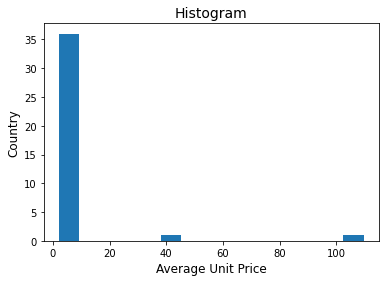

In [36]:
# 7.2 - Визуализация

plt.xlabel('Average Unit Price', size = 12)
plt.ylabel('Country', size = 12)
plt.title("Histogram", size = 14)
plt.hist(by_country, bins = 15)

#### 8.Получить DataFrame с MultiIndex любым способом

In [37]:
df_1 = pd.DataFrame(data = di)
argagg_func = {'unit_price': ['mean'], 'quantity': ['sum']}

rng = np.random.default_rng()
rng = rng.integers(len(df_1['city']), size=len(df_1['city']))
rng = np.sort(rng)
df2 = df_1.pivot_table(index = ['city', 'date'], columns = rng, 
                       aggfunc = argagg_func).fillna(0)
df2

quantity                                    unit_price  \
                         sum                                          mean   
                           0      1      2       4      5     6          0   
city     date                                                                
Istanbul 2023-01-09      0.0    0.0    0.0     0.0  445.0   0.0       0.00   
         2023-01-12      0.0    0.0    0.0     0.0    0.0  50.0       0.00   
Mumbai   2023-02-01      0.0    0.0  845.0     0.0    0.0   0.0       0.00   
         2023-02-03      0.0    0.0    0.0  1050.0    0.0   0.0       0.00   
New York 2023-01-10    106.0    0.0    0.0     0.0    0.0   0.0       2.55   
         2023-01-11      0.0  544.0    0.0     0.0    0.0   0.0       0.00   
         2023-02-06      0.0    0.0  901.0     0.0    0.0   0.0       0.00   

                                                   
                                                   
                        1     2     4     5     6  
city     date                                      
Istanbul 2023-01-09  0.00  0.00  0.00  2.45  0.00  
         2023-01-12  0.00  0.00  0.00  0.00  3.01  
Mumbai   2023-02-01  0.00  3.39  0.00  0.00  0.00  
         2023-02-03  0.00  0.00  2.05  0.00  0.00  
New York 2023-01-10  0.00  0.00  0.00  0.00  0.00  
         2023-01-11  2.99  0.00  0.00  0.00  0.00  
         2023-02-06  0.00  2.75  0.00  0.00  0.00

8.1 Переставить местами уровни индекса

In [38]:
df2 = df.pivot_table(index = ['date', 'city'], columns = rng, 
                       aggfunc = argagg_func).fillna(0)
df2

quantity                                    unit_price  \
                         sum                                          mean   
                           0      1      2       4      5     6          0   
date       city                                                              
2023-01-09 Istanbul      0.0    0.0    0.0     0.0  445.0   0.0       0.00   
2023-01-10 New York    106.0    0.0    0.0     0.0    0.0   0.0       2.55   
2023-01-11 New York      0.0  544.0    0.0     0.0    0.0   0.0       0.00   
2023-01-12 Istanbul      0.0    0.0    0.0     0.0    0.0  50.0       0.00   
2023-02-01 Mumbai        0.0    0.0  845.0     0.0    0.0   0.0       0.00   
2023-02-03 Mumbai        0.0    0.0    0.0  1050.0    0.0   0.0       0.00   
2023-02-06 New York      0.0    0.0  901.0     0.0    0.0   0.0       0.00   

                                                   
                                                   
                        1     2     4     5     6  
date       city                                    
2023-01-09 Istanbul  0.00  0.00  0.00  2.45  0.00  
2023-01-10 New York  0.00  0.00  0.00  0.00  0.00  
2023-01-11 New York  2.99  0.00  0.00  0.00  0.00  
2023-01-12 Istanbul  0.00  0.00  0.00  0.00  3.01  
2023-02-01 Mumbai    0.00  3.39  0.00  0.00  0.00  
2023-02-03 Mumbai    0.00  0.00  2.05  0.00  0.00  
2023-02-06 New York  0.00  2.75  0.00  0.00  0.00

8.2 Транспонировать таблицу (или создать новую другую) с MultiIndex

In [39]:
df2.transpose()

date              2023-01-09 2023-01-10 2023-01-11 2023-01-12 2023-02-01  \
city                Istanbul   New York   New York   Istanbul     Mumbai   
quantity   sum  0       0.00     106.00       0.00       0.00       0.00   
                1       0.00       0.00     544.00       0.00       0.00   
                2       0.00       0.00       0.00       0.00     845.00   
                4       0.00       0.00       0.00       0.00       0.00   
                5     445.00       0.00       0.00       0.00       0.00   
                6       0.00       0.00       0.00      50.00       0.00   
unit_price mean 0       0.00       2.55       0.00       0.00       0.00   
                1       0.00       0.00       2.99       0.00       0.00   
                2       0.00       0.00       0.00       0.00       3.39   
                4       0.00       0.00       0.00       0.00       0.00   
                5       2.45       0.00       0.00       0.00       0.00   
                6       0.00       0.00       0.00       3.01       0.00   

date              2023-02-03 2023-02-06  
city                  Mumbai   New York  
quantity   sum  0       0.00       0.00  
                1       0.00       0.00  
                2       0.00     901.00  
                4    1050.00       0.00  
                5       0.00       0.00  
                6       0.00       0.00  
unit_price mean 0       0.00       0.00  
                1       0.00       0.00  
                2       0.00       2.75  
                4       2.05       0.00  
                5       0.00       0.00  
                6       0.00       0.00

8.3 Удалить один из уровней индекса или добавить новый уровень индекса

In [40]:
df2.droplevel(0)

quantity                                    unit_price              \
              sum                                          mean               
                0      1      2       4      5     6          0     1     2   
city                                                                          
Istanbul      0.0    0.0    0.0     0.0  445.0   0.0       0.00  0.00  0.00   
New York    106.0    0.0    0.0     0.0    0.0   0.0       2.55  0.00  0.00   
New York      0.0  544.0    0.0     0.0    0.0   0.0       0.00  2.99  0.00   
Istanbul      0.0    0.0    0.0     0.0    0.0  50.0       0.00  0.00  0.00   
Mumbai        0.0    0.0  845.0     0.0    0.0   0.0       0.00  0.00  3.39   
Mumbai        0.0    0.0    0.0  1050.0    0.0   0.0       0.00  0.00  0.00   
New York      0.0    0.0  901.0     0.0    0.0   0.0       0.00  0.00  2.75   

                            
                            
             4     5     6  
city                        
Istanbul  0.00  2.45  0.00  
New York  0.00  0.00  0.00  
New York  0.00  0.00  0.00  
Istanbul  0.00  0.00  3.01  
Mumbai    0.00  0.00  0.00  
Mumbai    2.05  0.00  0.00  
New York  0.00  0.00  0.00

#### 9. Продемонстировать работу .merge

In [41]:
# Cоздадим новый дадасет, который будем присоединять

df_new = [{'city': df_1['city'][0],'name': 'mask', 'remains': 4056, 'minimal_amount': 50, 'delivery': '3 days'},
          {'city': df_1['city'][1],'name': 'gloves', 'remains': 3326, 'minimal_amount': 50,'delivery': '3 days' },
          {'city': df_1['city'][2],'name': 'gloves', 'remains': 2327, 'minimal_amount': 50, 'delivery': '7 days'},
          {'city': df_1['city'][3],'name': 'test to diagnose', 'remains': 3016, 'minimal_amount': 100, 'delivery': '3 days'},
          {'city': df_1['city'][4],'name': 'mask', 'remains': 1326, 'minimal_amount': 100, 'delivery': '10 days'},
          {'city': df_1['city'][5],'name': 'mask', 'remains': 326, 'minimal_amount': 50, 'delivery': '7 days'},
          {'city': df_1['city'][6],'name': 'test to diagnose', 'remains': 2359, 'minimal_amount': 30, 'delivery': '10 days'}]

df_new = pd.DataFrame(data = df_new)
df_new

,city,name,remains,minimal_amount,delivery
0,New York,mask,4056,50,3 days
1,New York,gloves,3326,50,3 days
2,Mumbai,gloves,2327,50,7 days
3,New York,test to diagnose,3016,100,3 days
4,Mumbai,mask,1326,100,10 days
5,Istanbul,mask,326,50,7 days
6,Istanbul,test to diagnose,2359,30,10 days


In [42]:
df_merge = df_1.merge(df_new, left_on= 'city', 
                      right_on= 'city') 
df_merge = df_merge.pivot_table(index = ['date', 'city'], columns = 'name').fillna(0) 
df_merge

minimal_amount                         quantity          \
name                        gloves   mask test to diagnose   gloves    mask   
date       city                                                               
2023-01-09 Istanbul            0.0   50.0             30.0      0.0   445.0   
2023-01-10 New York           50.0   50.0            100.0    106.0   106.0   
2023-01-11 New York           50.0   50.0            100.0    544.0   544.0   
2023-01-12 Istanbul            0.0   50.0             30.0      0.0    50.0   
2023-02-01 Mumbai             50.0  100.0              0.0    845.0   845.0   
2023-02-03 Mumbai             50.0  100.0              0.0   1050.0  1050.0   
2023-02-06 New York           50.0   50.0            100.0    901.0   901.0   

                                     remains                           \
name                test to diagnose  gloves    mask test to diagnose   
date       city                                                         
2023-01-09 Istanbul            445.0     0.0   326.0           2359.0   
2023-01-10 New York            106.0  3326.0  4056.0           3016.0   
2023-01-11 New York            544.0  3326.0  4056.0           3016.0   
2023-01-12 Istanbul             50.0     0.0   326.0           2359.0   
2023-02-01 Mumbai                0.0  2327.0  1326.0              0.0   
2023-02-03 Mumbai                0.0  2327.0  1326.0              0.0   
2023-02-06 New York            901.0  3326.0  4056.0           3016.0   

                    unit_price                         
name                    gloves  mask test to diagnose  
date       city                                        
2023-01-09 Istanbul       0.00  2.45             2.45  
2023-01-10 New York       2.55  2.55             2.55  
2023-01-11 New York       2.99  2.99             2.99  
2023-01-12 Istanbul       0.00  3.01             3.01  
2023-02-01 Mumbai         3.39  3.39             0.00  
2023-02-03 Mumbai         2.05  2.05             0.00  
2023-02-06 New York       2.75  2.75             2.75

#### 10. Продемонстрировать работу с .concat или append

In [43]:
# Вар_1: с помощью среза поделим самый первый датасет на две части, а потом их объединим

df_p1 = data[:10]
df_p2 = data[10:100]
df_p3 = pd.concat([df_p1,df_p2])
df_p3

,Quantity,InvoiceDate,UnitPrice,Country
0,6,2010-12-01,2.55,United Kingdom
1,6,2010-12-01,3.39,United Kingdom
2,8,2010-12-01,2.75,United Kingdom
3,6,2010-12-01,3.39,United Kingdom
4,6,2010-12-01,3.39,United Kingdom
...,...,...,...,...
95,6,2010-12-01,2.55,United Kingdom
96,120,2010-12-01,0.42,United Kingdom
97,24,2010-12-01,0.55,United Kingdom
98,24,2010-12-01,0.55,United Kingdom


In [44]:
# Вар 2: создадим новый дадасет и объединим его с датасетом из пункта 4

df_new = df_new.drop('delivery', axis = 1)

df_new2 = [{'city': 'Austin','name': 'mask', 'remains': 2404, 'minimal_amount': 50},
          {'city': 'Austin','name': 'gloves', 'remains': 3006, 'minimal_amount': 50},
          {'city': 'San Francisco','name': 'gloves', 'remains': 4025, 'minimal_amount': 50},
          {'city': 'Boston','name': 'test to diagnose', 'remains': 2016, 'minimal_amount': 100},
          {'city': 'San Francisco','name': 'mask', 'remains': 1566, 'minimal_amount': 100},
          {'city': 'Boston','name':'mask', 'remains': 2226, 'minimal_amount': 50},
          {'city': 'Boston','name':'test to diagnose', 'remains': 1059, 'minimal_amount': 30}]


df_new2 = pd.DataFrame(data = df_new2)
df_new2

,city,name,remains,minimal_amount
0,Austin,mask,2404,50
1,Austin,gloves,3006,50
2,San Francisco,gloves,4025,50
3,Boston,test to diagnose,2016,100
4,San Francisco,mask,1566,100
5,Boston,mask,2226,50
6,Boston,test to diagnose,1059,30


In [45]:
# Соединим с прошлым датасетом, который мы готовили для метода .pivot (пункт 4)
df_concat = pd.concat([df_new, df_new2], keys = ['cities with delivery', 'cities without delivery']) 
df_concat 

city              name  remains  \
cities with delivery    0       New York              mask     4056   
                        1       New York            gloves     3326   
                        2         Mumbai            gloves     2327   
                        3       New York  test to diagnose     3016   
                        4         Mumbai              mask     1326   
                        5       Istanbul              mask      326   
                        6       Istanbul  test to diagnose     2359   
cities without delivery 0         Austin              mask     2404   
                        1         Austin            gloves     3006   
                        2  San Francisco            gloves     4025   
                        3         Boston  test to diagnose     2016   
                        4  San Francisco              mask     1566   
                        5         Boston              mask     2226   
                        6         Boston  test to diagnose     1059   

                           minimal_amount  
cities with delivery    0              50  
                        1              50  
                        2              50  
                        3             100  
                        4             100  
                        5              50  
                        6              30  
cities without delivery 0              50  
                        1              50  
                        2              50  
                        3             100  
                        4             100  
                        5              50  
                        6              30

#### 11. Проитерировать dataframe построчно .iterrows() 

In [46]:
# используем iterrows для получения каждого элемента строк в датафрейме.
for i  in df_new.iterrows():
    print(i)

(0, city              New York
name                  mask
remains               4056
minimal_amount          50
Name: 0, dtype: object)
(1, city              New York
name                gloves
remains               3326
minimal_amount          50
Name: 1, dtype: object)
(2, city              Mumbai
name              gloves
remains             2327
minimal_amount        50
Name: 2, dtype: object)
(3, city                      New York
name              test to diagnose
remains                       3016
minimal_amount                 100
Name: 3, dtype: object)
(4, city              Mumbai
name                mask
remains             1326
minimal_amount       100
Name: 4, dtype: object)
(5, city              Istanbul
name                  mask
remains                326
minimal_amount          50
Name: 5, dtype: object)
(6, city                      Istanbul
name              test to diagnose
remains                       2359
minimal_amount                  30
Name: 6, dtype: object)
